In [1]:
import torch
from diffusers import FluxPipeline

from nunchaku import NunchakuFluxTransformer2dModel

In [2]:
device = torch.device("cuda")

In [3]:
transformer,m = NunchakuFluxTransformer2dModel.from_pretrained("mit-han-lab/svdq-int4-flux.1-dev")
pipeline = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev", transformer=transformer, torch_dtype=torch.bfloat16
).to("cuda")

#prompts = ["A panda drinking beer. Very realistic photo.",
#           "A Welsh Corgi holding a sign that says hello world. Very realistic photo."]

#prompts = "A Welsh Corgi holding a sign that says hello world. Very realistic photo."

prompts = ["A panda drinking beer. Very realistic photo.",
           "A Welsh Corgi holding a sign that says hello world. Very realistic photo.",
           #"A huge tiger holding a sign that says hello world. Very realistic photo.",
           "A dragon holding a sign that says hello world. Very realistic photo."
           ]



[2025-04-06 13:33:19.845] [info] Initializing QuantizedFluxModel
[2025-04-06 13:33:19.919] [info] Loading weights from /home/ict04/.cache/huggingface/hub/models--mit-han-lab--svdq-int4-flux.1-dev/snapshots/3af964b97d298d4ed9da753edcc1ba3b322031f2/transformer_blocks.safetensors
[2025-04-06 13:33:22.286] [info] Done.


Expected types for transformer: ['FluxTransformer2DModel'], got NunchakuFluxTransformer2dModel.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
image = pipeline(prompts, num_inference_steps=50, guidance_scale=3.5)

  0%|          | 0/50 [00:00<?, ?it/s]

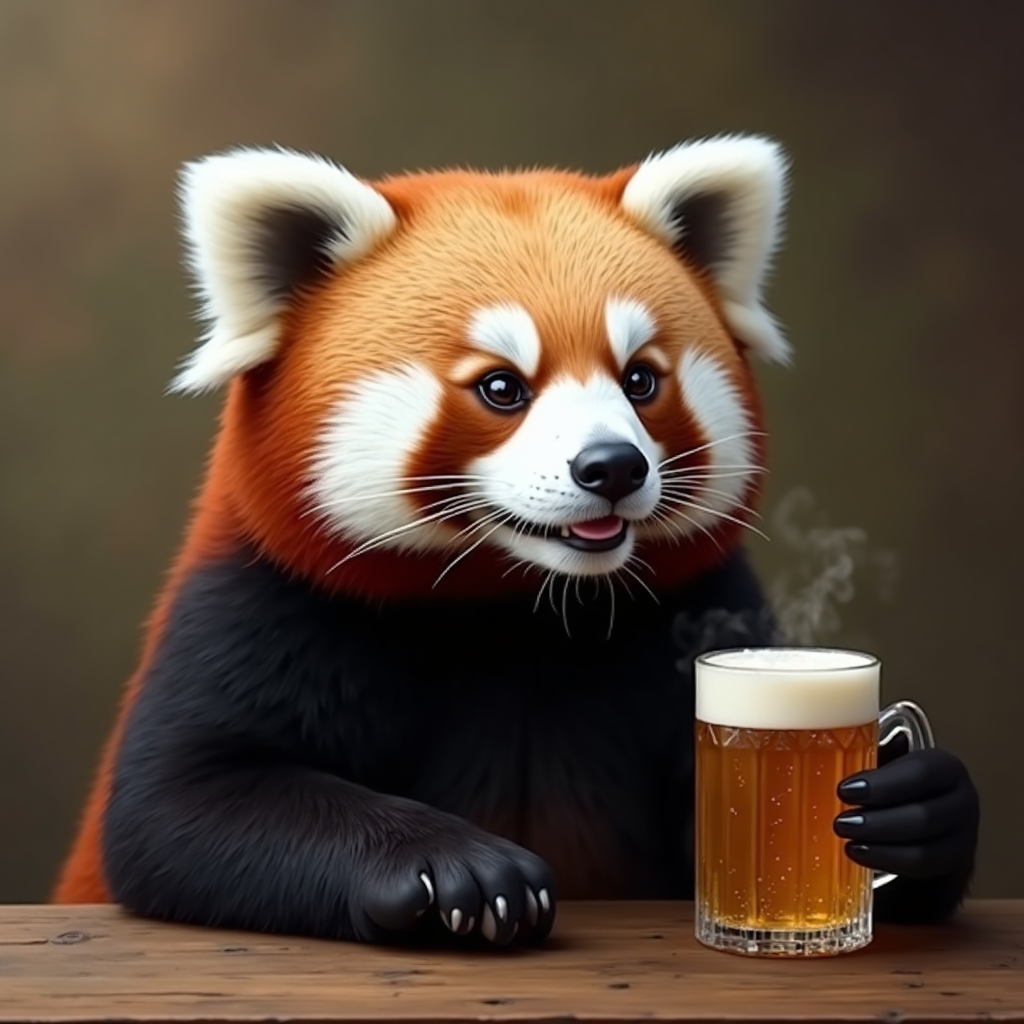

In [5]:
image[0][0]

In [6]:
image[0][0].save("flux.1-dev.png")

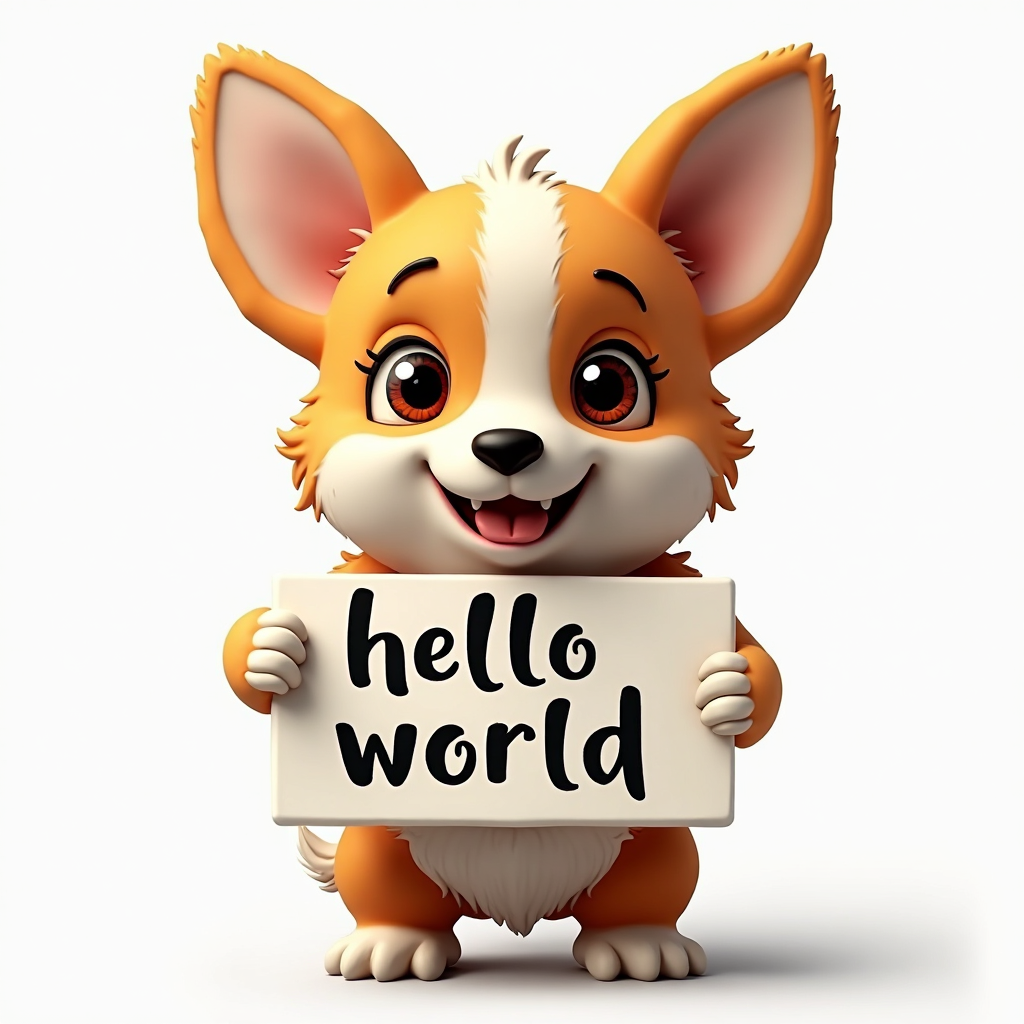

In [7]:
image[0][1]

In [8]:
image[0][1].save("flux.2-dev.png")

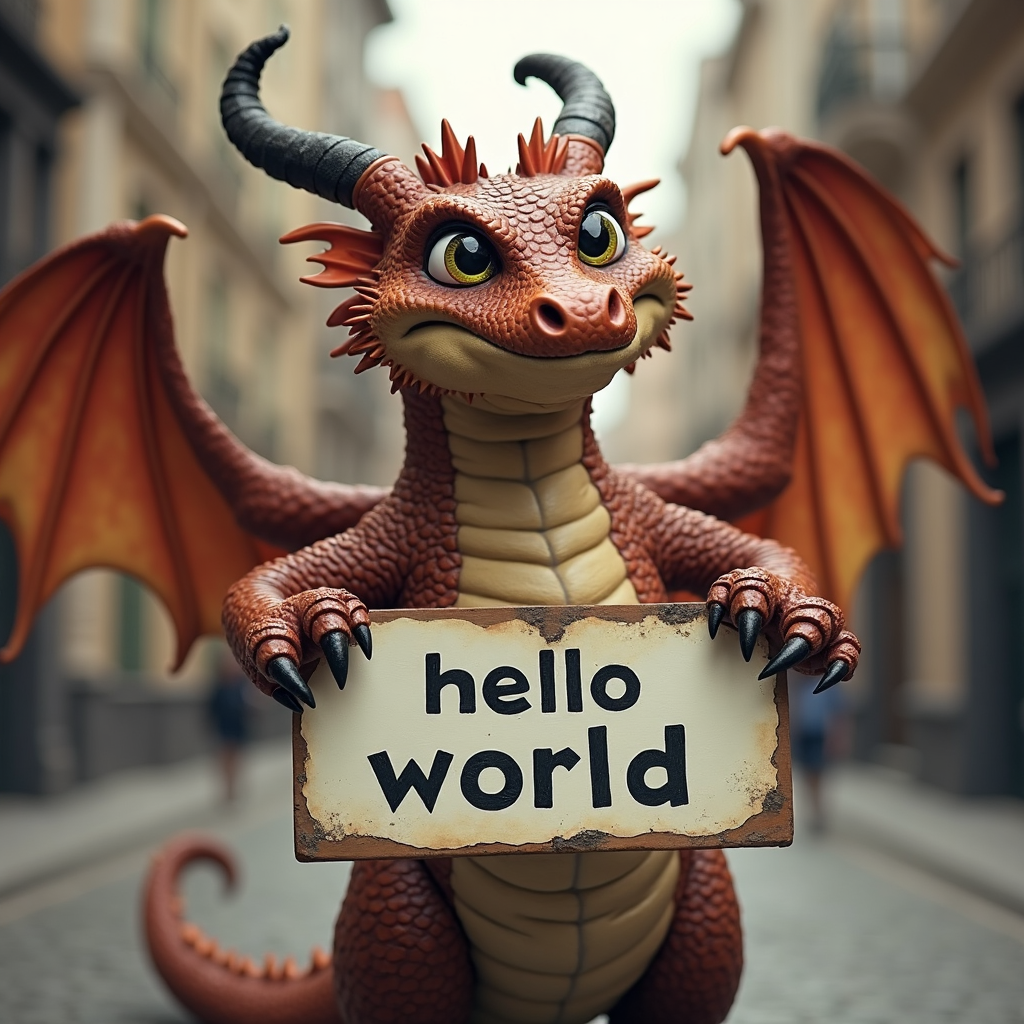

In [9]:
image[0][2]

In [10]:
image[0][2].save("flux.3-dev.png")